In [370]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pca as pca_alt
from mlxtend.plotting import plot_pca_correlation_graph
from matplotlib import cm


plt.rcParams['font.size'] = 14

In [371]:
data = pd.read_csv('data.csv',index_col=0)

species_list = []
compteur = 0
for j in range(data.shape[1]):
    for i in range(len(data.index)):
        if(data.iloc[i,j]==0):
            species_list.append(data.columns[j]) # liste des espèces non observées durant une certaine ériode
            compteur += 1
            break #dès qu'un 0 est détecté, on passe à l'espèce suivante
        
data = data.drop(species_list, axis=1) # 12 mois d'observations et 12 espèces prises en compte
data_nostd = data.copy()
scaler = StandardScaler()
donnees_std = scaler.fit_transform(data)
data = pd.DataFrame(donnees_std, index=data.index, columns=data.columns)
data.head()

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
Mois,,,,,,,,,,,,
janvier,1.278443,1.279754,-0.371391,1.002640,1.923357,2.720927,1.841892,1.980427,-0.916135,1.690437,1.217223,-0.026252
fevrier,-0.657840,0.612056,0.185695,-0.271303,-0.334497,0.309196,-1.180700,0.396085,-0.916135,-1.084432,-0.553283,-0.341279
mars,1.725278,-0.055641,1.856953,1.285739,1.923357,0.865749,1.464068,1.980427,2.532843,0.446531,0.110657,1.548882
avril,-0.955729,-0.055641,-0.928477,-0.412852,-0.334497,-0.618392,-0.236140,-1.188256,-0.485013,-0.893061,-1.659850,-0.026252
mai,-0.955729,-0.723339,0.742781,1.285739,-1.087115,-0.989428,0.141684,-0.282918,0.592793,-0.988746,0.553283,0.603801


**7. Appliquez un ACP. Affichez les deux premières composantes principales sous forme
d’un nuage de points pour visualiser les résultats. Identifiez chaque mois par une
couleur différente, et ajoutez une légende. Ajoutez aussi sur les axes le pourcentage
de variance expliquée par chaque composante. Commentez.**

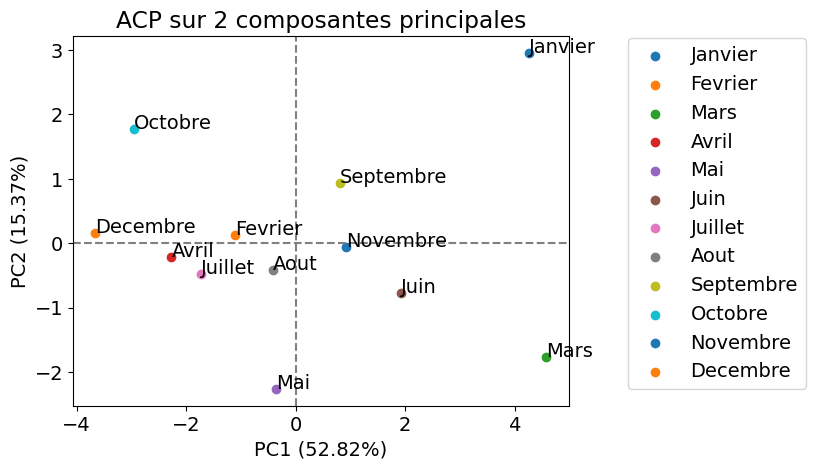

In [372]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

fig, ax = plt.subplots()

labels = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']

for i, label in enumerate(labels):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], label=label)
    ax.annotate(label, (principal_components[i, 0], principal_components[i, 1]))
    
variance_exp = pca.explained_variance_ratio_
ax.set_xlabel(f'PC1 ({variance_exp[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({variance_exp[1]*100:.2f}%)')

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.legend(bbox_to_anchor=(1.1, 1.02), loc='upper left')
ax.set_title("ACP sur 2 composantes principales")
plt.show()

**8. Affichez la variance de chaque variable obtenue dans l’espace de l’ACP. Commentez.
Quelle est la définition de la variance expliquée ? Quelle est le lien avec les variances
que vous venez de calculer ?**

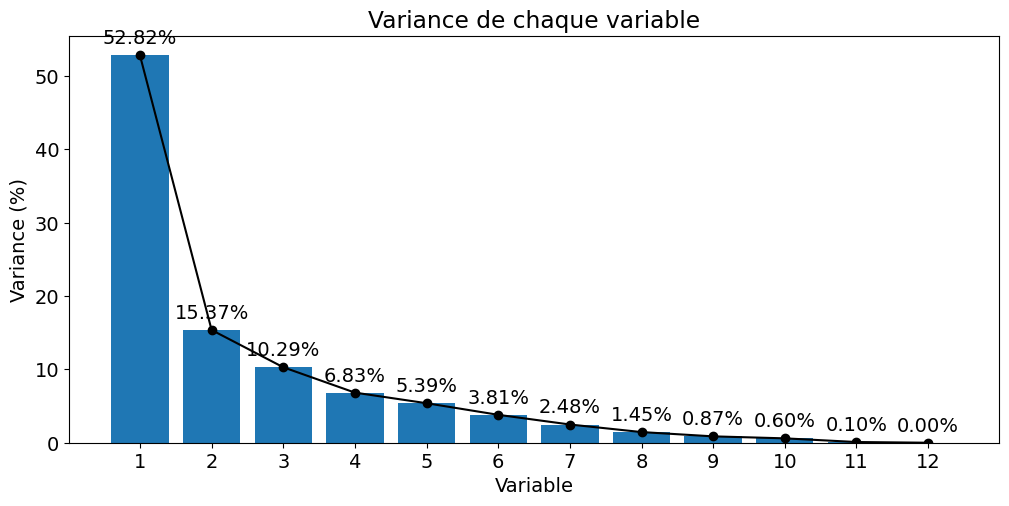

In [373]:
pca = PCA()
pca.fit(data)
variances = pca.explained_variance_ratio_ * 100

# Plot the variances
plt.figure(figsize=(len(variances),max(variances)/10))
plt.bar(range(1, len(variances)+1), variances)

# Add dots with percentage values on top of each bar
for i, var in enumerate(variances):

    plt.plot(i + 1, var, 'ko')
    plt.text(i + 1, var + 1, f'{var:.2f}%', ha='center', va='bottom')
    if i > 0:
        plt.plot([i, i + 1], [variances[i - 1], var], 'k')

plt.xticks(range(1, len(variances) + 1))
plt.xlabel('Variable')
plt.ylabel('Variance (%)')
plt.title('Variance de chaque variable')

plt.show()

**9. Affichez et commentez le cercle de corrélation. Permet-il de retrouver les résultats
des questions 3 et 6 ?**

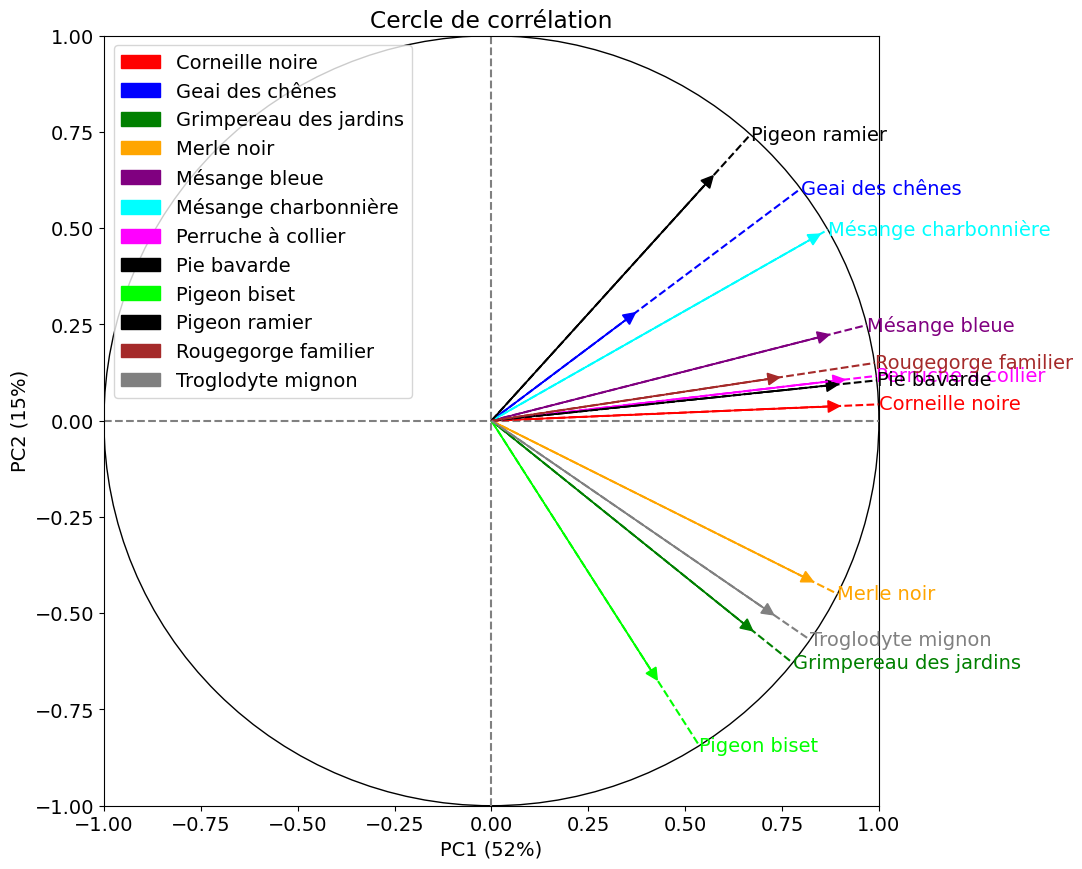

In [374]:
figure, correlation_matrix = plot_pca_correlation_graph(data, data.columns, dimensions=(1, 2), figure_axis_size=10)
plt.close(figure)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='none')
ax.add_patch(circle)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black', 'lime', 'black', 'brown', 'gray']
i = 0
arrows = []
names =  []

for name, row in correlation_matrix.iterrows():
    x, y = row.values
    y *= -1
    x *= -1
    arrow = ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc=colors[i], ec=colors[i])
    ax.plot([0, x/np.sqrt(x**2 + y**2)], [0, y/np.sqrt(x**2 + y**2)], color=colors[i], linestyle='--')
    ax.text(x/np.sqrt(x**2 + y**2), y/np.sqrt(x**2 + y**2), name, color=colors[i], ha='left', va='center',fontsize=14)
    i+=1
    arrows.append(arrow)
    names.append(name)

ax.set_xlabel("PC1 ({}%)".format(int(pca.explained_variance_ratio_[0] * 100)))
ax.set_ylabel("PC2 ({}%)".format(int(pca.explained_variance_ratio_[1] * 100)))
ax.set_title("Cercle de corrélation")
ax.legend(arrows, names,loc='upper left')
plt.show()




/tmp/ipykernel_151551/2031215606.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')  # Choose the desired colormap
/tmp/ipykernel_151551/2031215606.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm, label='Intensité', pad=0.2)


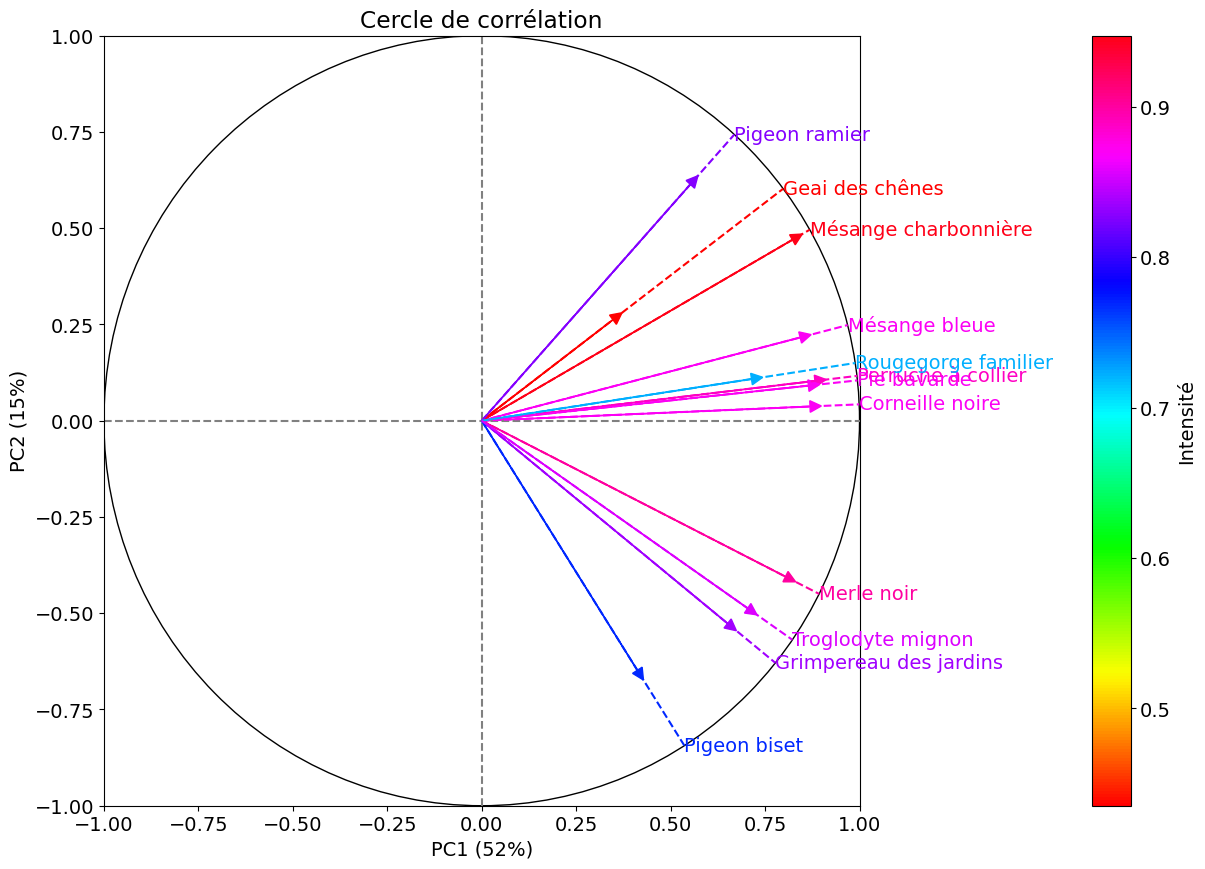

In [375]:
figure, correlation_matrix = plot_pca_correlation_graph(data, data.columns, dimensions=(1, 2), figure_axis_size=10)
plt.close(figure)

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='none')
ax.add_patch(circle)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black', 'lime', 'black', 'brown', 'gray']
i = 0
arrows = []
lengths = []
texts = []
lines = []

for name, row in correlation_matrix.iterrows():
    x, y = row.values
    y *= -1
    x *= -1
    arrow = ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc=colors[i], ec=colors[i])
    text = ax.text(x/np.sqrt(x**2 + y**2), y/np.sqrt(x**2 + y**2), name, color=colors[i], ha='left', va='center',fontsize=14)
    arrow_length = np.sqrt(x**2 + y**2)
    arrows.append(arrow)
    lengths.append(arrow_length)
    texts.append(text)
    i += 1

normalized_lengths = (lengths - np.min(lengths)) / (np.max(lengths) - np.min(lengths))

cmap = cm.get_cmap('hsv')  # Choose the desired colormap

for arrow, length, normalized_length, text in zip(arrows, lengths, normalized_lengths, texts):
    color = cmap(normalized_length)
    arrow.set_color(color)
    text.set_color(color)

i = 0
for name, row in correlation_matrix.iterrows():
    x, y = row.values
    y *= -1
    x *= -1
    color = cmap(normalized_lengths[i])
    line = ax.plot([0, x/np.sqrt(x**2 + y**2)], [0, y/np.sqrt(x**2 + y**2)], color=color, linestyle='--')
    i += 1

ax.set_xlabel("PC1 ({}%)".format(int(pca.explained_variance_ratio_[0] * 100)))
ax.set_ylabel("PC2 ({}%)".format(int(pca.explained_variance_ratio_[1] * 100)))
ax.set_title("Cercle de corrélation")

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(lengths)
colorbar = plt.colorbar(sm, label='Intensité', pad=0.2)

plt.show()

**10. Affichez la figure de la question 7, mais en y superposant cette fois-ci le vecteur
associé à la variable perruche à collier affiché à la question 9. En déduire le mois où
on observe le plus de perruches à collier.**

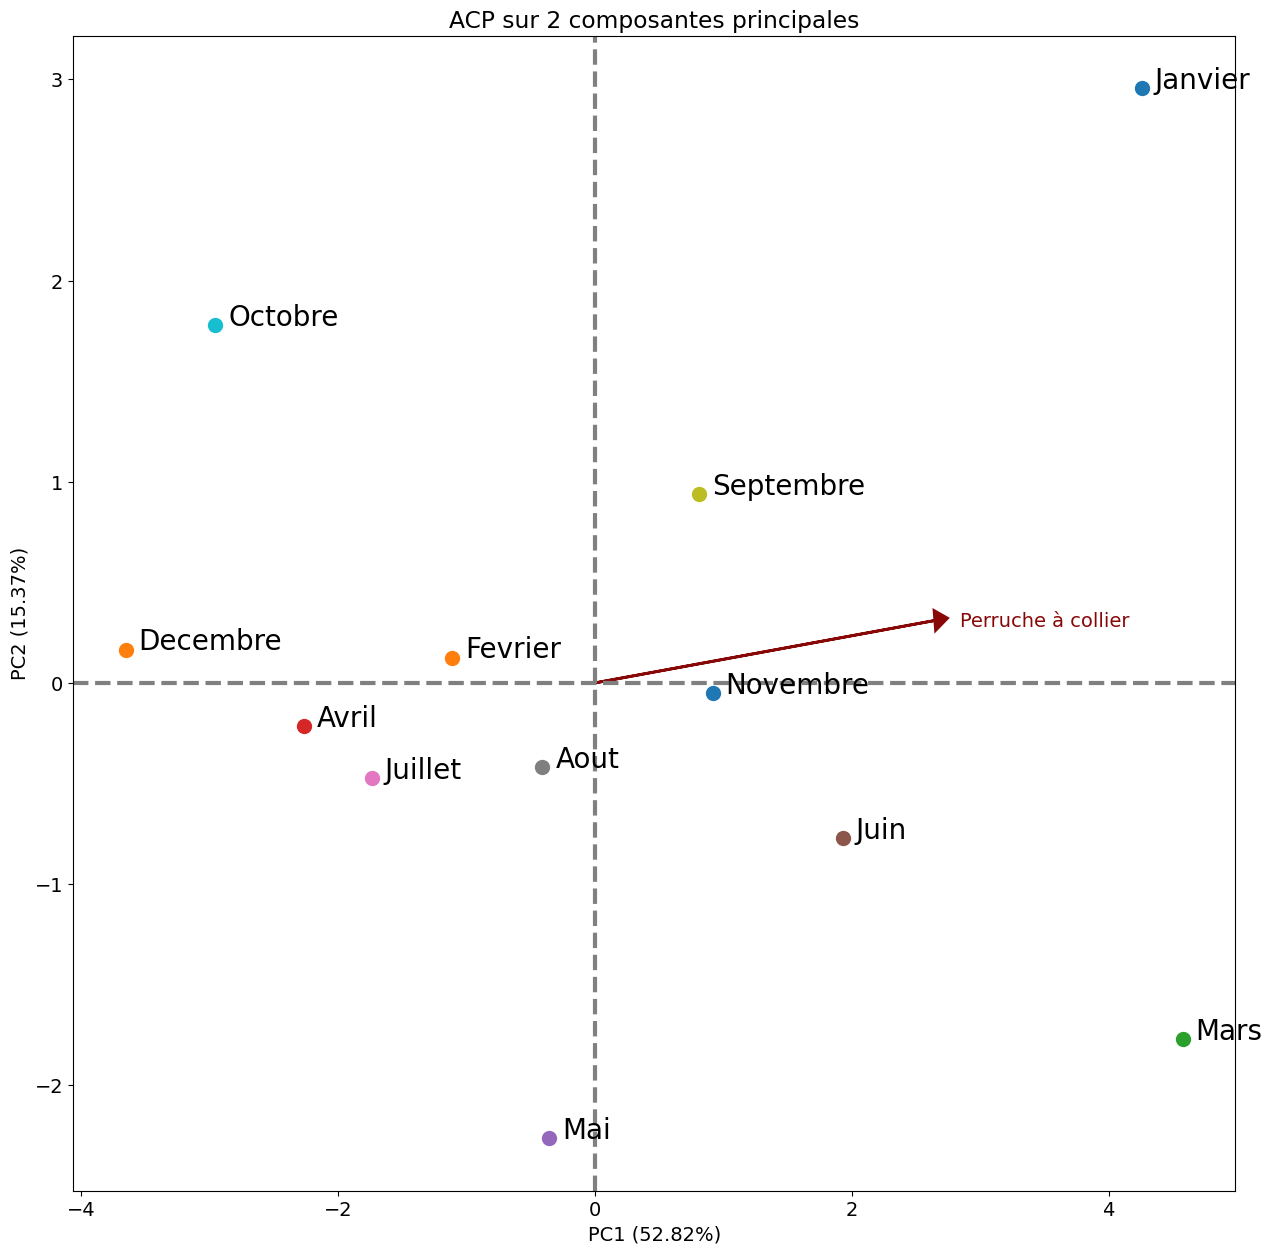

In [376]:
figure, correlation_matrix = plot_pca_correlation_graph(data, data.columns, dimensions=(1, 2), figure_axis_size=10)
plt.close(figure)

fig, ax = plt.subplots(figsize=(15,15))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
pcs = pca.components_

labels = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']

for i, label in enumerate(labels):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], label=label, s=100)
    ax.annotate(label, (principal_components[i, 0] + 0.1, principal_components[i, 1]),c='k',fontsize=20)

ax.axhline(0, color='gray', linestyle='--',linewidth=3)
ax.axvline(0, color='gray', linestyle='--',linewidth=3)

for name, row in correlation_matrix.iterrows():
    if name == "Perruche à collier":
        x, y = row
        y *= -3
        x *= -3
        ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, lw=2, fc='#880808', ec='#880808')
        ax.text(x+0.2, y, name, color='#880808', ha='left', va='center',fontsize=14)

variance_exp = pca.explained_variance_ratio_
ax.set_xlabel(f'PC1 ({variance_exp[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({variance_exp[1]*100:.2f}%)')
ax.set_title("ACP sur 2 composantes principales")
plt.show()

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


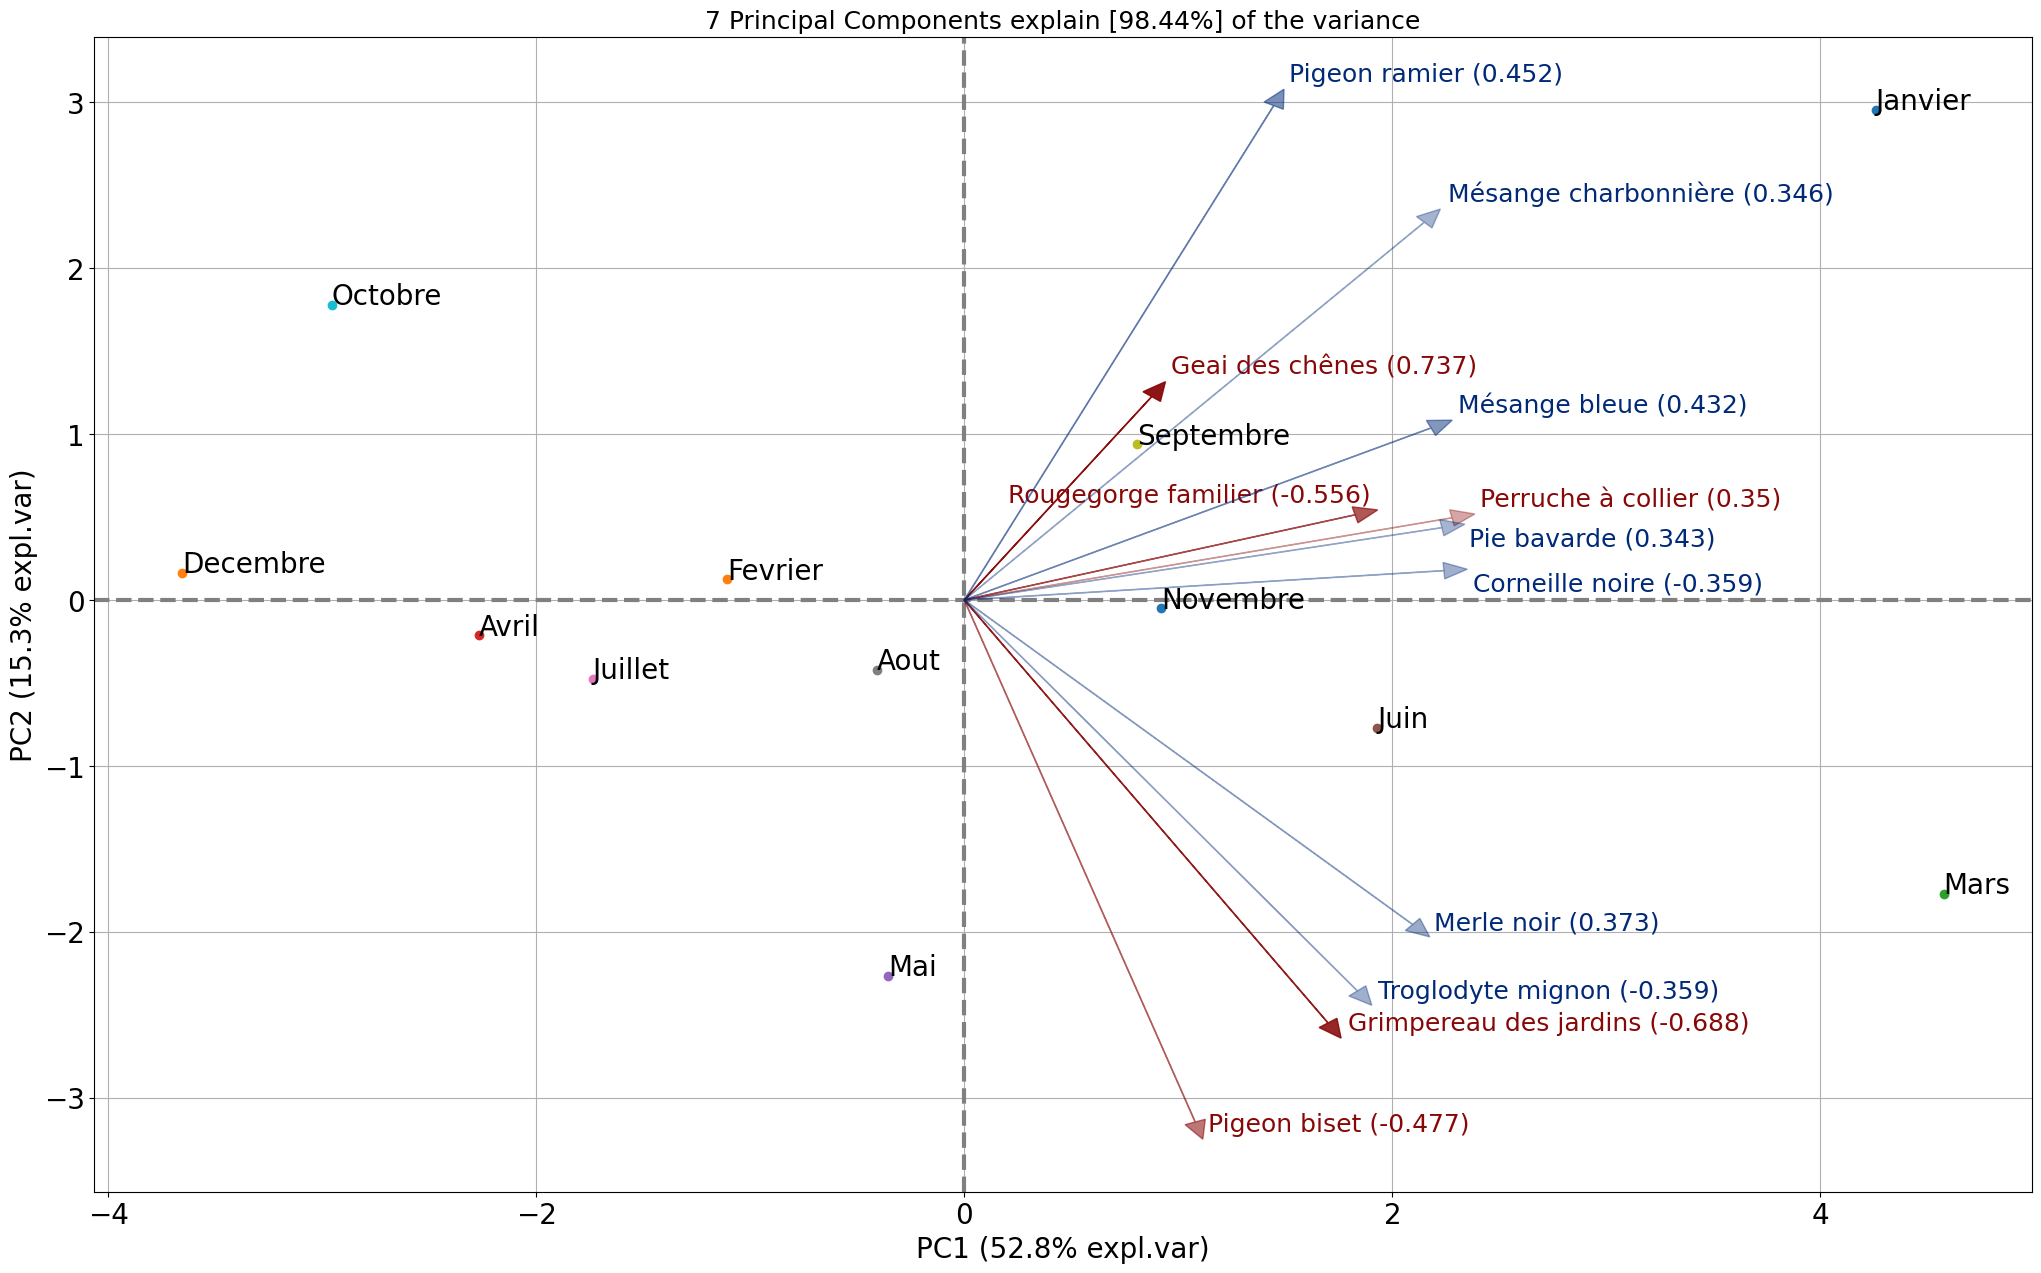

In [377]:
fig, ax = plt.subplots(figsize=(25,15))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

labels = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']

for i, label in enumerate(labels):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], label=label)
    ax.annotate(label, (principal_components[i, 0], principal_components[i, 1]),c='k',fontsize=20)

ax.axhline(0, color='gray', linestyle='--',linewidth=3)
ax.axvline(0, color='gray', linestyle='--',linewidth=3)

model = pca_alt.pca()
out = model.fit_transform(data)
fig, ax = model.biplot(cmap=None,legend=False,fig=fig,ax=ax)